In [1]:
color = 'dimgray'
color_g = 'gray'
edgecolor = 'black'
colors = ['#d9d9d9', '#b3b3b3', '#808080', '#4d4d4d']  


Overall survival rate: 0.38


C:\Users\90586\AppData\Local\Temp\ipykernel_11192\4159709395.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


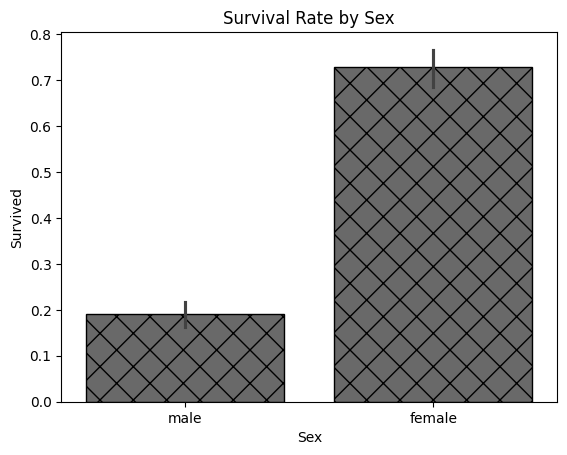

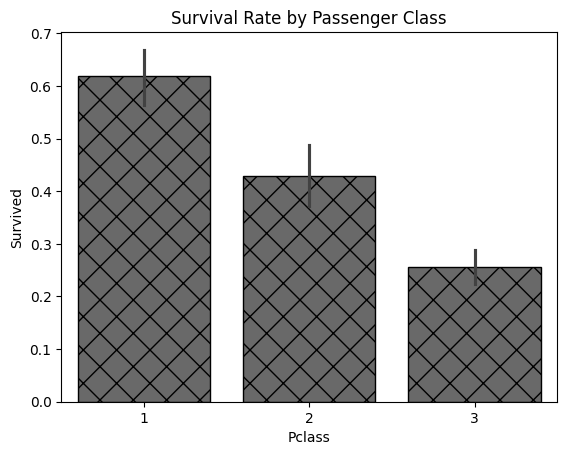

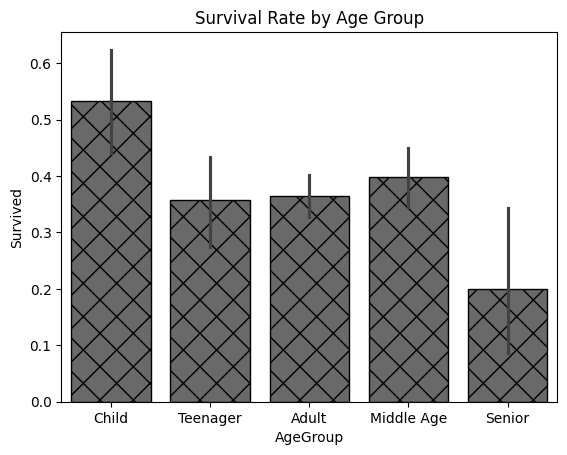

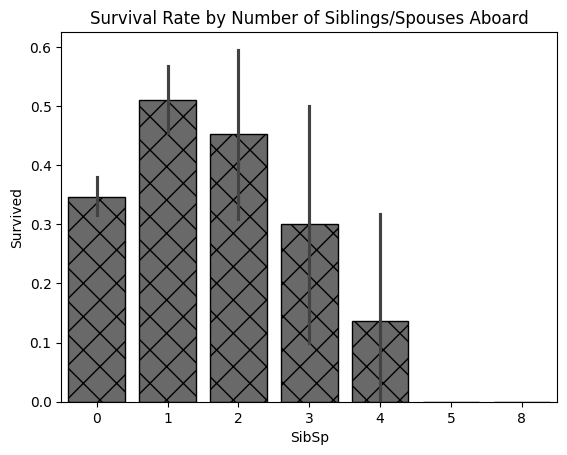

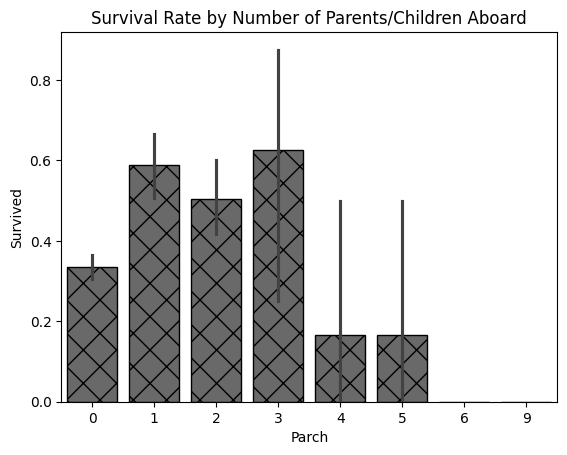

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('extend.csv')

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

survival_rate = titanic_data['Survived'].mean()
print(f'Overall survival rate: {survival_rate:.2f}')


sns.barplot(x='Sex', y='Survived', data=titanic_data, color=color, edgecolor=edgecolor, hatch='x')

plt.title('Survival Rate by Sex')
plt.savefig('graph/sur_sex.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

sns.barplot(x='Pclass', y='Survived', data=titanic_data, color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival Rate by Passenger Class')
plt.savefig('graph/sur_class.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

sns.barplot(x='AgeGroup', y='Survived', data=titanic_data, color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival Rate by Age Group')
plt.savefig('graph/sur_age.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

sns.barplot(x='SibSp', y='Survived', data=titanic_data, color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.savefig('graph/sur_sib.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

sns.barplot(x='Parch', y='Survived', data=titanic_data ,color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.savefig('graph/sur_parch.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

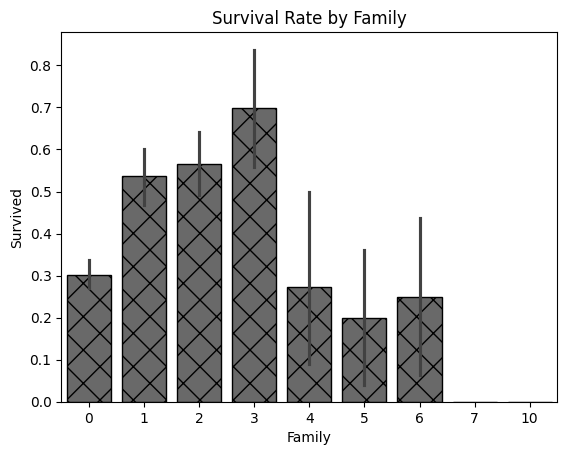

In [3]:
sns.barplot(x = titanic_data['Family'], y = titanic_data['Survived'], color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival Rate by Family')
plt.show()


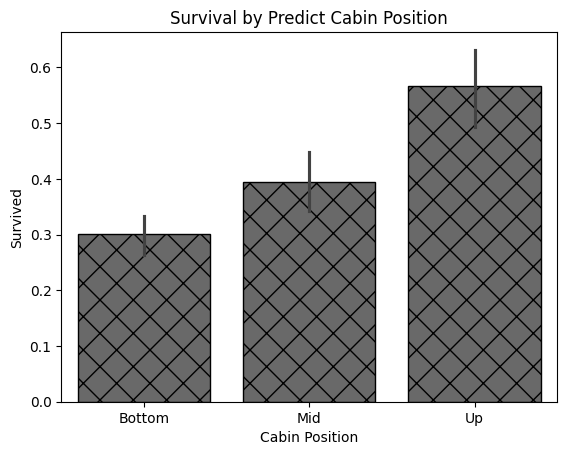

In [4]:
import numpy as np
to_check = ["C", "D", "B", "E", "A", "T", "F", "G"]
bottom = ['G', 'F']
mid = ['D', 'E']
up = ['A', 'B', 'C', 'T']
strip_data = titanic_data[titanic_data['Predict_Cabin'].isin(to_check)].copy()
strip_data['Cabin Position'] = np.where(strip_data['Predict_Cabin'].isin(bottom), 'Bottom',
                                  np.where(strip_data['Predict_Cabin'].isin(mid), 'Mid',
                                  np.where(strip_data['Predict_Cabin'].isin(up), 'Up', 'Unknown')))
position_order = ['Bottom', 'Mid', 'Up']
sns.barplot(x = strip_data['Cabin Position'], y = strip_data['Survived'], order = position_order, color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival by Predict Cabin Position')
plt.savefig('graph/sur_predict_cabin_pos.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

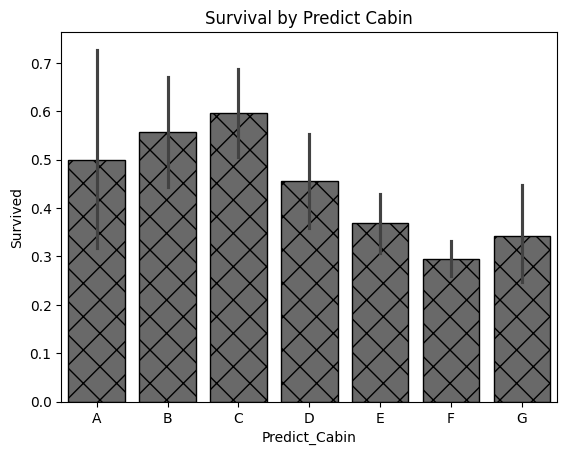

In [5]:
to_check = ["A", "B", "C", "D", "E", "F", "G"]
strip_data = titanic_data[titanic_data['Predict_Cabin'].isin(to_check)].copy()
sns.barplot(x = strip_data['Predict_Cabin'], y = strip_data['Survived'], order = to_check, color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival by Predict Cabin')
plt.savefig('graph/sur_predict_cabin.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [6]:
to_check = ["C", "D", "B", "E", "A", "T", "F", "G"]
bottom = ['G', 'F']
mid = ['D', 'E']
up = ['A', 'B', 'C', 'T']
cor_df = titanic_data[titanic_data['Predict_Cabin'].isin(to_check)].copy()
cor_df = cor_df[['Class', 'Predict_Cabin']]
cor_df['Cabin Position'] = np.where(cor_df['Predict_Cabin'].isin(bottom), 3,
                                  np.where(cor_df['Predict_Cabin'].isin(mid), 2,
                                  np.where(cor_df['Predict_Cabin'].isin(up), 1, pd.NA)))
correlation = cor_df['Class'].corr(cor_df['Cabin Position'])

print(f'Correlation between class and predict cabin: {correlation:.2f}')

Correlation between class and predict cabin: 0.70


C:\Users\90586\AppData\Local\Temp\ipykernel_11192\1460730539.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gray'` for the same effect.

  sns.countplot(data=cor_df, x='Class', hue='Cabin Position',  color = color_g)


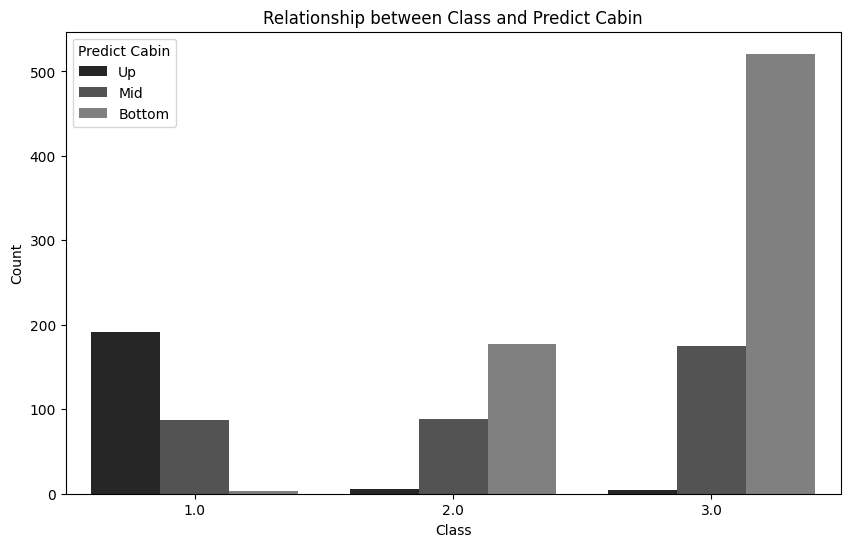

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_df['Cabin Position'] = cor_df['Cabin Position'].map({1: 'Up', 2: 'Mid', 3: 'Bottom'})

plt.figure(figsize=(10, 6))
sns.countplot(data=cor_df, x='Class', hue='Cabin Position',  color = color_g)
plt.title('Relationship between Class and Predict Cabin')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Predict Cabin')
plt.savefig('graph/class_predict_cabin.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

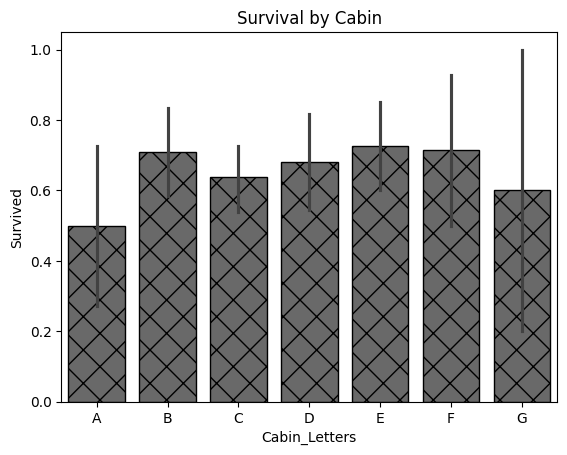

In [8]:
to_check = ["A", "B", "C", "D", "E", "F", "G"]
strip_data = titanic_data[titanic_data['Cabin_Letters'].isin(to_check)].copy()
sns.barplot(x = strip_data['Cabin_Letters'], y = strip_data['Survived'], order = to_check ,color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival by Cabin')
plt.savefig('graph/sur_cabin.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [9]:
with_cabin = titanic_data[titanic_data['Cabin_Letters'] != 'Unknown'].copy()
with_cabin
to_check = ["C", "D", "B", "E", "A", "T", "F", "G"]
bottom = ['G', 'F']
mid = ['D', 'E']
up = ['A', 'B', 'C', 'T']
with_cabin = with_cabin[with_cabin['Cabin_Letters'].isin(to_check)].copy()
with_cabin = with_cabin[['Class', 'Cabin_Letters']]
print(with_cabin)
with_cabin['Cabin_Letters'] = np.where(with_cabin['Cabin_Letters'].isin(bottom), 3,
                                  np.where(with_cabin['Cabin_Letters'].isin(mid), 2,
                                  np.where(with_cabin['Cabin_Letters'].isin(up), 1, pd.NA)))
correlation = cor_df['Class'].corr(with_cabin['Cabin_Letters'])
print(f'Correlation between class and cabin: {correlation:.2f}')

      Class Cabin_Letters
1       1.0             C
3       1.0             C
6       1.0             E
10      3.0             G
11      1.0             C
...     ...           ...
1295    1.0             D
1296    1.0             D
1298    1.0             C
1302    1.0             C
1305    1.0             C

[254 rows x 2 columns]
Correlation between class and cabin: 0.60


C:\Users\90586\AppData\Local\Temp\ipykernel_11192\1891290757.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gray'` for the same effect.

  sns.countplot(data=with_cabin, x='Class', hue='Cabin_Letters',  color=color_g)


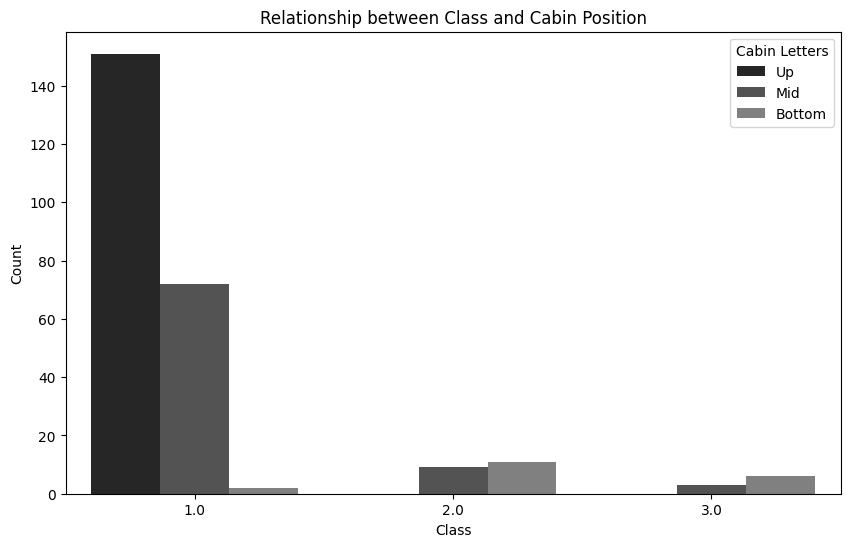

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

with_cabin['Cabin_Letters'] = with_cabin['Cabin_Letters'].map({1: 'Up', 2: 'Mid', 3: 'Bottom'})

plt.figure(figsize=(10, 6))
sns.countplot(data=with_cabin, x='Class', hue='Cabin_Letters',  color=color_g)
plt.title('Relationship between Class and Cabin Position')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Cabin Letters')
plt.savefig('graph/class_cabin_position.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [11]:
titanic_data['Region'].unique()

array(['England', 'US', 'Finland', 'Sweden', 'Ottoman Empire', 'Belgium',
       'Lebanon', 'Canada', 'Bulgaria', 'Mexico', 'Channel Islands',
       'France', 'Wales', 'Switzerland', 'Turkey', 'Greece', 'China',
       'Norway', 'Siam', 'Uruguay', 'Italy', 'Russian Empire', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', nan, 'Germany', 'Poland',
       'New York City', 'Slovenia', 'Unknown', 'Estonia', 'Egypt',
       'The Netherlands', 'Peru', 'Lithuania', 'Syria or Lebanon', 'Cuba',
       'Macedonia', 'Belarus', 'British India', 'Austria'], dtype=object)

In [12]:
titanic_data['Country'].unique()

array(['UK', 'US', 'Russian Empire', 'Sweden', 'Ottoman Empire',
       'Belgium', 'Canada', 'Bulgaria', 'Mexico', 'France', 'Switzerland',
       'Greece', 'China', 'Norway', 'Siam', 'Uruguay', 'Italy', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', 'Unknown', 'Germany',
       'Poland', 'Slovenia', 'Egypt', 'The Netherlands', 'Peru',
       'Syria or Lebanon', 'Cuba', 'Macedonia', 'Belarus', 'Austria'],
      dtype=object)

In [13]:
country_map = {
    'British': ['UK', 'Scotland'],
    'Near East': ['Greece', 'Ottoman Empire', 'Syria', 'Egypt', 'Syria or Lebanon'],
    'North Europe': ['Sweden', 'Norway', 'Denmark'],
    'East Europe': ['Bulgaria', 'Russian Empire', 'Bosnia', 'Poland', 'Slovenia', 'Macedonia', 'Belarus'], 
    'West Europe': ['Belgium', 'France', 'Portugal', 'Spain', 'Russian Empire', 'Russia', 'The Netherlands'],
    'Central Europe': ['Italy', 'Croatia', 'Switzerland', 'Croatia', 'Germany', 'Austria'],
    'North America': ['US', 'Canada',],
    'East Asia': ['China', 'Japan'],
    'Latin America': ['Uruguay', 'Mexico', 'Argentina', 'Peru', 'Cuba'],
    'South East Asia': ['Siam', ],
    'Australia': ['Australia']
}

In [14]:
region_map = {country: region for region, countries in country_map.items() for country in countries}

def map_country_to_region(country):
    return region_map.get(country, 'Other')  

titanic_data['General Region'] = titanic_data['Country'].apply(map_country_to_region)

titanic_data.loc[titanic_data['Region'] == 'British India', 'General Region'] = "India"
print(titanic_data['General Region'].unique())

['British' 'North America' 'West Europe' 'North Europe' 'Near East'
 'East Europe' 'Latin America' 'Central Europe' 'East Asia'
 'South East Asia' 'Australia' 'Other' 'India']


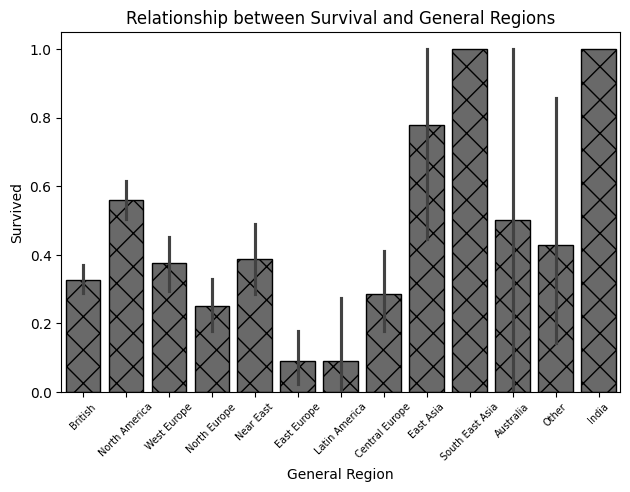

In [15]:
sns.barplot(x = titanic_data['General Region'], y = titanic_data['Survived'], color=color, edgecolor=edgecolor, hatch='x')
plt.xticks(rotation=45, fontsize=7, ha='center', va='top')  
plt.tight_layout()
plt.title('Relationship between Survival and General Regions')
plt.savefig('graph/sur_general_region.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [16]:
bins = [0, 10,  60, 100]
labels = ['0-10', '20-40', '40-60']
titanic_data['Fare Group'] = pd.cut(titanic_data['Real_Fare'], bins=bins, labels=labels)
titanic_data['Fare Group']

0        0-10
1       20-40
2        0-10
3       20-40
4        0-10
        ...  
1304     0-10
1305      NaN
1306     0-10
1307     0-10
1308      NaN
Name: Fare Group, Length: 1309, dtype: category
Categories (3, object): ['0-10' < '20-40' < '40-60']

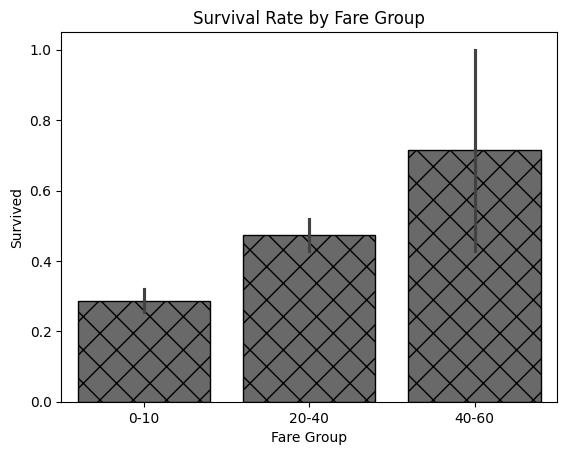

In [17]:
sns.barplot(x='Fare Group', y='Survived', data=titanic_data, color=color, edgecolor=edgecolor, hatch='x')
plt.title('Survival Rate by Fare Group')
plt.savefig('graph/sur_rate_fare_group.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

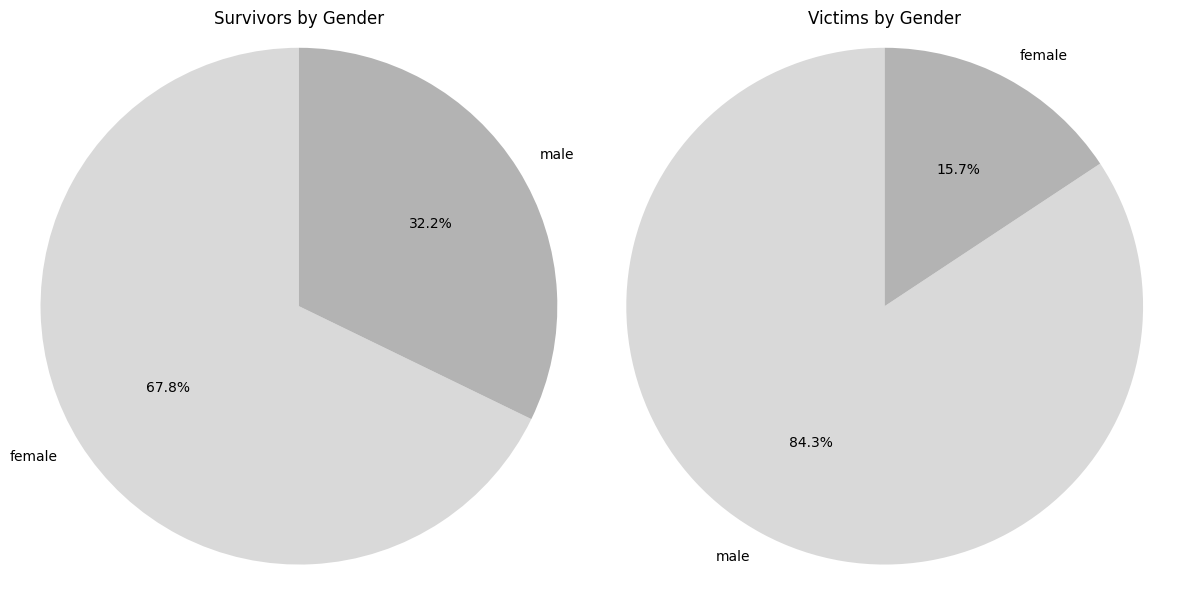

In [18]:
df = titanic_data
survivors = df[df['Survived'] == 1]['Sex'].value_counts()
victims = df[df['Survived'] == 0]['Sex'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(survivors, labels=survivors.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  # 使饼图为圆形
ax1.set_title('Survivors by Gender')

ax2.pie(victims, labels=victims.index, autopct='%1.1f%%', startangle=90, colors = colors)
ax2.axis('equal')  # 使饼图为圆形
ax2.set_title('Victims by Gender')

plt.tight_layout()
plt.savefig('graph/pie_gender.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

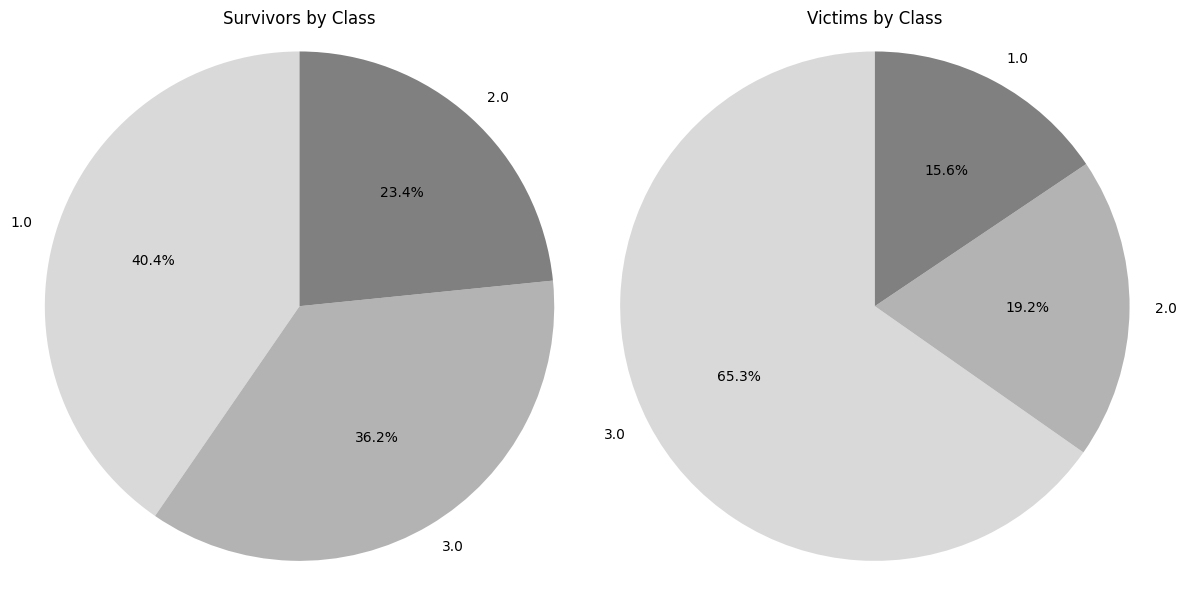

In [19]:
df = titanic_data
survivors = df[df['Survived'] == 1]['Class'].value_counts()
victims = df[df['Survived'] == 0]['Class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(survivors, labels=survivors.index, autopct='%1.1f%%', startangle=90, colors = colors)
ax1.axis('equal')  # 使饼图为圆形
ax1.set_title('Survivors by Class')

ax2.pie(victims, labels=victims.index, autopct='%1.1f%%', startangle=90, colors = colors)
ax2.axis('equal')  # 使饼图为圆形
ax2.set_title('Victims by Class')

plt.tight_layout()
plt.savefig('graph/pie_class.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

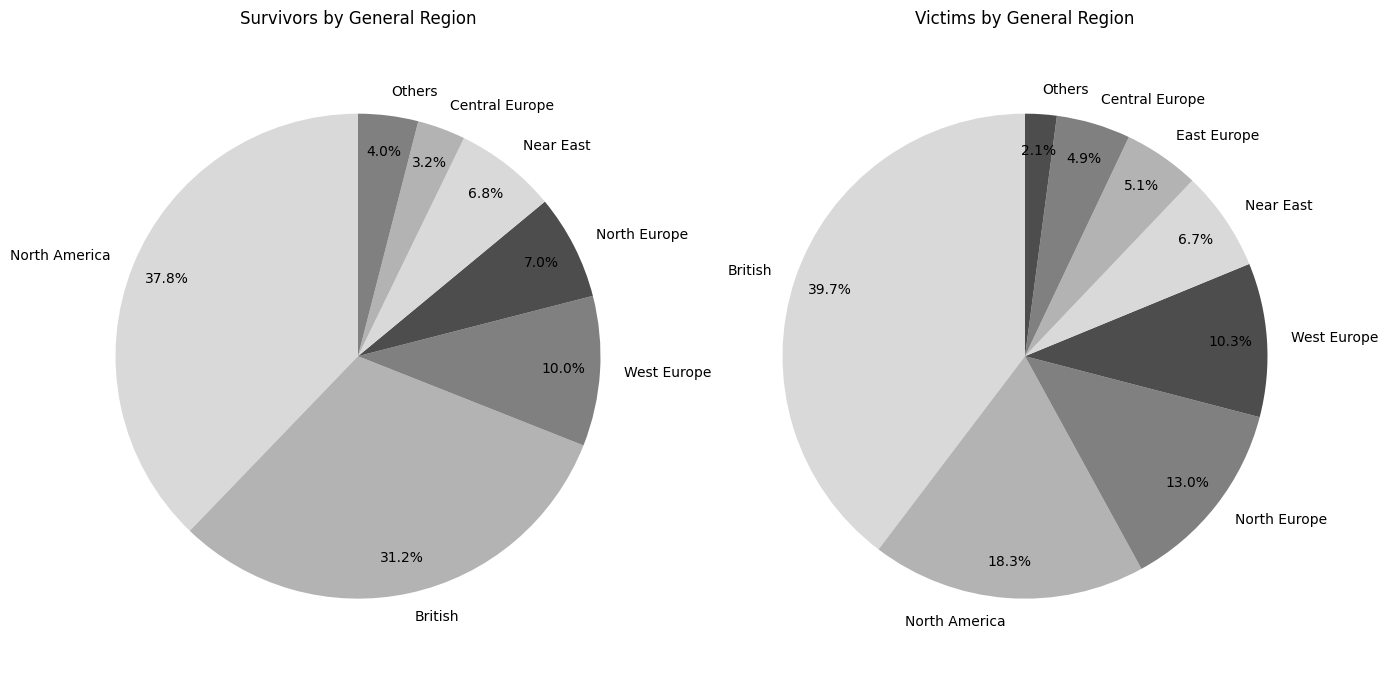

In [20]:
feature = "General Region"
df = titanic_data
survivors = df[df['Survived'] == 1][feature].value_counts()
victims = df[df['Survived'] == 0][feature].value_counts()

threshold = 11  

def simplify_labels(series):
    filtered = series[series >= threshold]
    other_count = series[series < threshold].sum()
    if other_count > 0:
        filtered['Others'] = other_count
    return filtered

survivors_simplified = simplify_labels(survivors)
victims_simplified = simplify_labels(victims)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(survivors_simplified, labels=survivors_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors = colors)
ax1.axis('equal') 
ax1.set_title(f'Survivors by {feature}')

ax2.pie(victims_simplified, labels=victims_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors = colors)
ax2.axis('equal')  
ax2.set_title(f'Victims by {feature}')

plt.tight_layout()
plt.savefig('graph/pie_general_region.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

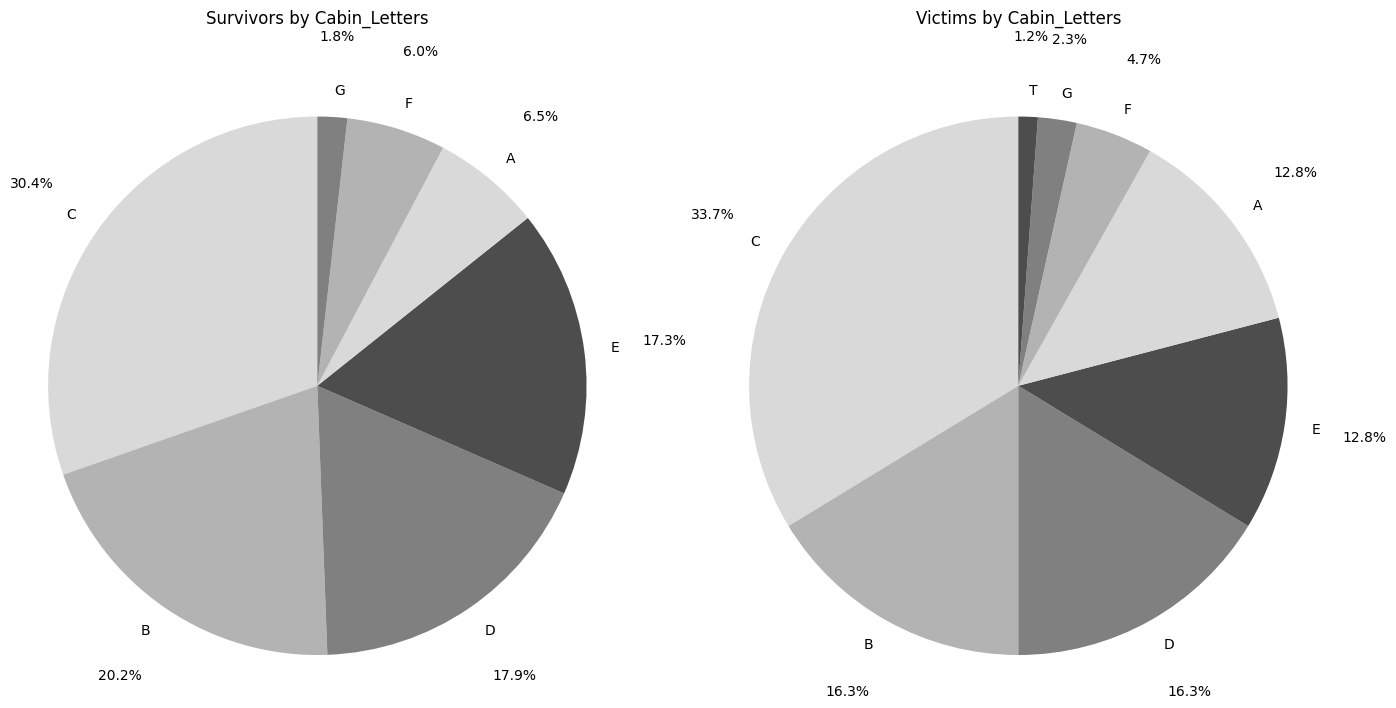

In [21]:

to_check = ["C", "D", "B", "E", "A", "T", "F", "G"]
with_cabin = titanic_data[titanic_data['Cabin_Letters'].isin(to_check)].copy()
feature = "Cabin_Letters"
df = with_cabin
survivors = df[df['Survived'] == 1][feature].value_counts()
victims = df[df['Survived'] == 0][feature].value_counts()

threshold = 1 

def simplify_labels(series):
    filtered = series[series >= threshold]
    other_count = series[series < threshold].sum()
    if other_count > 0:
        filtered[''] = other_count
    return filtered

survivors_simplified = simplify_labels(survivors)
victims_simplified = simplify_labels(victims)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(survivors_simplified, labels=survivors_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=1.3, colors = colors)
ax1.axis('equal') 
ax1.set_title(f'Survivors by {feature}', pad=50)

ax2.pie(victims_simplified, labels=victims_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=1.3, colors = colors)
ax2.axis('equal')  
ax2.set_title(f'Victims by {feature}', pad=50)

plt.tight_layout()
plt.savefig('graph/pie_cabin_letters.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

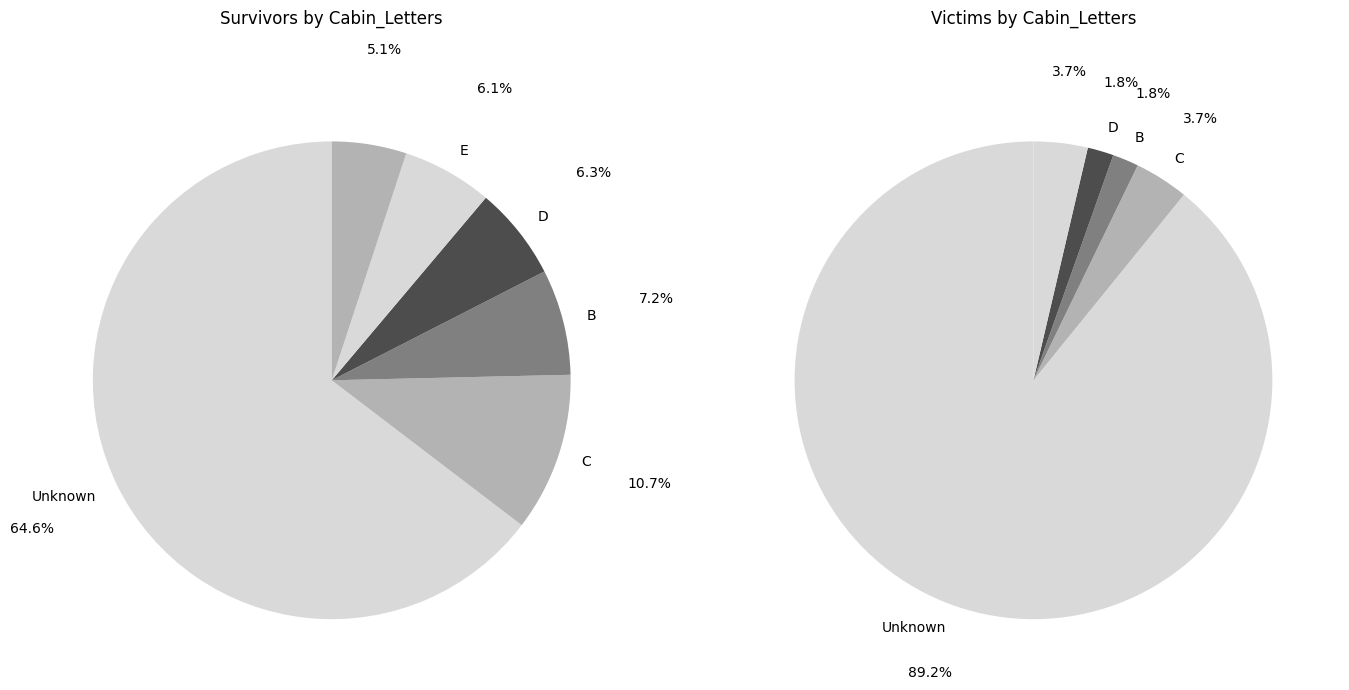

In [22]:
to_check = ["C", "D", "B", "E", "A", "T", "F", "G", 'Unknown']
with_cabin = titanic_data[titanic_data['Cabin_Letters'].isin(to_check)].copy()
feature = "Cabin_Letters"
df = with_cabin
survivors = df[df['Survived'] == 1][feature].value_counts()
victims = df[df['Survived'] == 0][feature].value_counts()

threshold = 12  

def simplify_labels(series):
    filtered = series[series >= threshold]
    other_count = series[series < threshold].sum()
    if other_count > 0:
        filtered[''] = other_count
    return filtered

survivors_simplified = simplify_labels(survivors)
victims_simplified = simplify_labels(victims)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(survivors_simplified, labels=survivors_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=1.4, colors = colors)
ax1.axis('equal') 
ax1.set_title(f'Survivors by {feature}', pad=50)

ax2.pie(victims_simplified, labels=victims_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=1.3, colors = colors)
ax2.axis('equal')  
ax2.set_title(f'Victims by {feature}', pad=50)

plt.tight_layout()
plt.savefig('graph/pie_cabin_letters_with_unknown.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

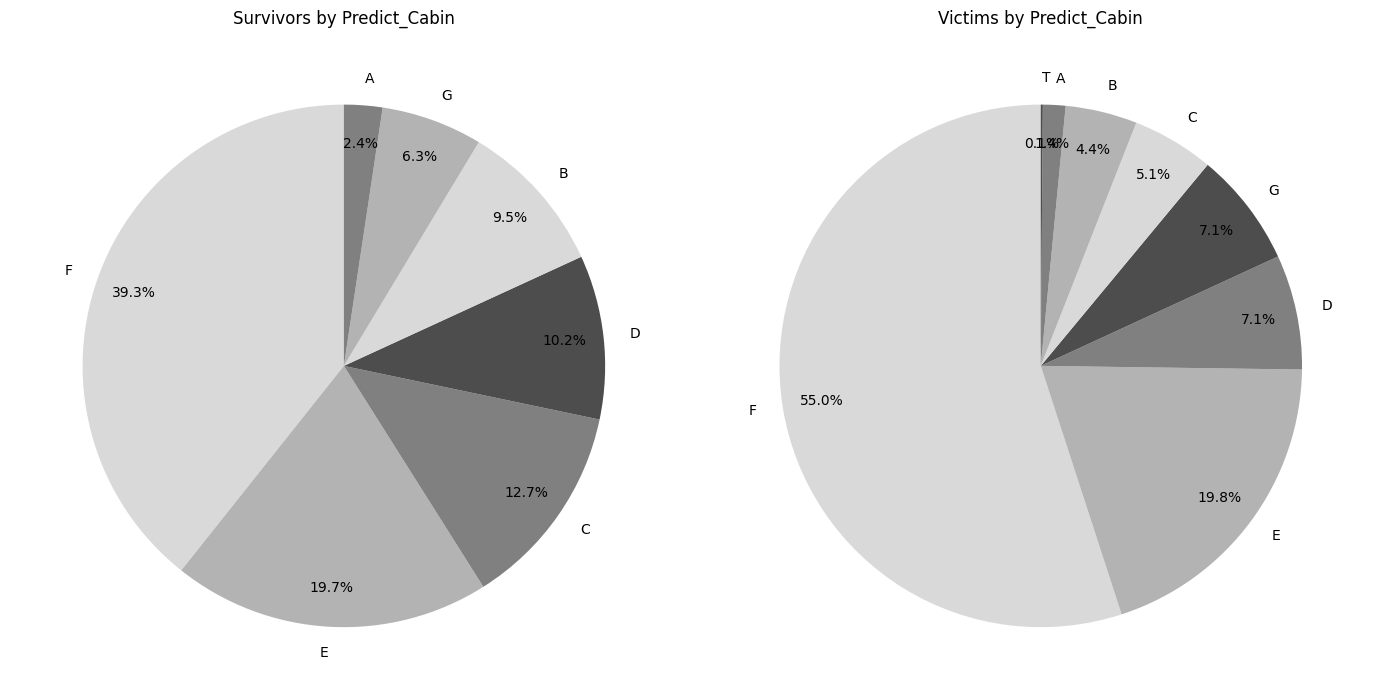

In [23]:
to_check = ["C", "D", "B", "E", "A", "T", "F", "G"]
strip_data = titanic_data[titanic_data['Predict_Cabin'].isin(to_check)].copy()
feature = "Predict_Cabin"
df = strip_data
survivors = df[df['Survived'] == 1][feature].value_counts()
victims = df[df['Survived'] == 0][feature].value_counts()

threshold = 1  

def simplify_labels(series):
    filtered = series[series >= threshold]
    other_count = series[series < threshold].sum()
    if other_count > 0:
        filtered['Others'] = other_count
    return filtered

survivors_simplified = simplify_labels(survivors)
victims_simplified = simplify_labels(victims)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(survivors_simplified, labels=survivors_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors = colors)
ax1.axis('equal') 
ax1.set_title(f'Survivors by {feature}', pad=20)

ax2.pie(victims_simplified, labels=victims_simplified.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors = colors)
ax2.axis('equal')  
ax2.set_title(f'Victims by {feature}', pad=20)

plt.tight_layout()
plt.savefig('graph/pie_predict_cabin.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()